## Importing libraries

In [27]:
pip install emoji

  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=7fec38fdc843f1a133f1082b3ee03c8f2a864876a4359692ea7aa20b00e95771
  Stored in directory: c:\users\sayan\appdata\local\pip\cache\wheels\fa\7a\e9\22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=9bee33f16b502f0225a3dc43f8fd5237734b0fce47ed224a581f82f2c7b2a4a2
  Stored in directory: c:\users\sayan\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [25]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sayan\AppData\Roaming\nltk_data...


True

In [31]:
!pip install pydot

In [32]:
!pip install graphviz

In [1]:
# importing dataset
import pandas as pd 
testing = pd.read_csv("C:/Users/sayan/Downloads/testing.csv")

In [2]:
from importlib import reload
import sys
from imp import reload
import warnings
warnings.filterwarnings('ignore')
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sayan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Concatenate, Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

In [4]:
import numpy as np

In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


## Displaying the imported original dataset

In [6]:
testing

,Unnamed: 0,customerid,reviewid,productid,productparent,producttitle,rating,verifiedpurchase,reviewtitle,Review body
0,3001092,23122587,R2Z6E9K5KICJIA,B000GK35M4,861263534,Robeez Soft Soles Puppy Slip On (Infant),5,Y,Robeeze,Excellent quality and excellent shipping. Thes...
1,2840103,50657394,R20WMAAXPXB9RQ,B0053VLGFO,656748795,Steve Madden Women's Parfait Platform Pump,4,Y,Girlfriend Loved them,I bought these for my girlfriend for the holid...
2,1947698,50766326,RIXS71RIGH6XK,B000XEN1R2,727246118,Timberland PRO Men's Direct Attach Six-Inch So...,5,Y,it was a gift,i hear the recipient loves them and wears them...
3,2400517,10834451,RQVTRTXXK08XQ,B00AVSO6WO,598515222,New Balance Women's WL574 Rugby Collection Run...,5,Y,Super Cute,The color of these is amazing. Just as vibran...
4,2168969,51913934,R2YQUDMLL038N9,B003IWYN2S,805111562,Kamik Men's Pearson Cold Weather Boot,5,Y,Oh Canada!!!,Got these because they are warm comfortable a...
...,...,...,...,...,...,...,...,...,...,...
902863,1056159,26934232,R3GJ3JVQZ9A07G,B00O1206O8,580660396,Thin OPTICS Stick Anywhere,Shoes,N,Y,Five Stars they work awesome!!!
902864,2769151,46373062,R1LQGVS15Q4PX6,B00368BONU,620625631,Sperry Top-Sider Women's Angelfish Oat Slip-On...,5,Y,Super comfi,I went a half size smaller and they are great!...
902865,1400728,9395706,R22MN0N6J82V6N,B00EDX0NR0,157922221,Globe Mens Fusion Skate Shoes,4,Y,My son got 5 months of heavy skateboarding wit...,Good support. As a nurse and mother I wanted ...
902866,2569470,12294849,RJKOW9TJ7LKIQ,B000AP0T92,721544290,Reebok Women's Princess Sneaker,4,Y,She really,Enjoys the shoes and they are just as she reme...


## Splitting the dataset into training and testing

In [7]:
# reducing the size of test data to 1 lac and creating our new dataset
from sklearn.model_selection import train_test_split

finaltr_data, working_data = train_test_split(testing, test_size=0.1, random_state=25)

print(f"No. of training examples: {finaltr_data.shape[0]}")
print(f"No. of testing examples: {working_data.shape[0]}")

No. of training examples: 812581
No. of testing examples: 90287


In [8]:
finalts_data, testing_data  = train_test_split(finaltr_data, test_size=0.05, random_state=25)

print(f"No. of training examples: {finalts_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 771951
No. of testing examples: 40630


In [9]:
working_data

,Unnamed: 0,customerid,reviewid,productid,productparent,producttitle,rating,verifiedpurchase,reviewtitle,Review body
804898,2361047,25929976,R3TFM0HVOOS20D,B000L0O09G,281605411,Merrell Men's Moab Ventilator Hiking Shoe,5,Y,Great Hiking Shoe,I bought these shoes for a trailing hiking vac...
765165,1825603,45076746,R213KXZ4P5TE3,B003UHU5T6,866537507,New Balance Men's MR860 Running Shoe,1,Y,Returned Shoe,New Balance shoe was advertised as 13B. Shoe ...
743357,1170569,6639856,R2XBYVDERMEO0D,B00FDXRMRI,245930226,Jessica Simpson Women's Wintee Dress Pump,4,Y,Four Stars,Great shoe 2014-12-28
105749,898438,18849452,R1JBBHTVGQ9YOG,B008G3BC7I,398112824,RYKA Women's Influence Cross Training Shoe,5,Y,Five Stars,Perfect fit!! Getting much use in Zumba class!...
610266,1481949,43263299,R1C50G9Q895L6W,B000G615UC,234909654,Bates Men's Ulta-lites 8 Inches Tactical Sport...,5,Y,Five Stars,Great warm comfortable boots
...,...,...,...,...,...,...,...,...,...,...
311431,2477225,3846769,RZFUS5I9G5XFG,B002U6CNNO,304024717,Large Slouchy Hobo Handbag (Pearl White),5,Y,I love it,There was a little problem with a shortage of ...
607966,243713,11957442,R2A55KDUMV0YQG,B002VEBMKK,790485410,Sof Sole Athlete Full Length Comfort Neutral A...,4,Y,Four Stars,Helps to support my arches when playing some b...
338015,1171851,942398,R1FSATI86HHLUX,B000ARWNR6,800987553,Tamarac by Slippers International Men's Scuffy...,5,Y,Five Stars,I love them 2014-12-28
502853,2968604,32814320,R2GB89REBU009O,B000W91YJK,647855043,T.U.K. Women's Tattoo Print Pump,5,Y,Super cute one-of-a-kind shoes!!!,Once I saw these shoes on amazon.com I knew I...


In [10]:
testing_data

,Unnamed: 0,customerid,reviewid,productid,productparent,producttitle,rating,verifiedpurchase,reviewtitle,Review body
362388,2888394,31890094,R9ZDNUBSM0AF,B001B2LGCW,440720720,"Smith & Wesson Men's Guardian 8"" Boot",1,Y,Waste of money!!!!,I thought with a name like Smith and Wesson I ...
499586,310957,537621,R25U9T65H0B84E,B00WODWFSG,802320903,Wild Diva Womens Open Toe Cuff Ankle Strap Sti...,4,Y,Four Stars,They are good but there is room for improvement.
333841,2982572,18221523,R4NYO3B3DVHFL,B000XPZKLQ,179729474,Reebok Women's Spright,4,N,Great product,I love these shoes. My only problem with them ...
802706,1880577,24917425,R2ZVW3FOPLM2QG,B00HNVYCWQ,683651261,zeroUV - Premium Half Frame Horn Rimmed Sungla...,4,Y,Great but too small for me,Great looking glasses! they are plastic but fo...
29759,1897696,2255989,RQA4WP3OQYVB9,B00FJPF3OE,816712898,Ahnu Women's Serena Sandal,5,Y,Order and you won't be sorry!,I love love these sandals. They are so cute ...
...,...,...,...,...,...,...,...,...,...,...
253364,1638861,3501638,R1V952GSJO7G8Q,B009T5D9HS,40299525,Altra Men's The Torin Running Shoe,5,Y,I love it,Nice shoes. 2014-09-09
472844,620798,1350719,R20B365GHNS3DA,B00C67RAE4,826207883,Ferrini Men's Print Crocodile S-Toe Western Boot,5,Y,Five Stars,Good boot. Got many compliments on them. 2015-...
842578,2080270,36911692,R3Q6JCT1YJ5P1K,B00187FR6Q,595724453,Ellie Shoes Women's 511-Gangster Slide Pump,5,Y,Everyone can check this shoes if u want to byu...,Exactly what I expected I love it it was for...
740376,2715390,50214758,R2ER92JEQRCJ11,B00591W8TQ,6624848,Eric Michael Laguna Boot,3,Y,Not worth it.,These boots are nice but I didn't feel they ar...


## Preprocessing Steps

***1.Dropping Columns
   2.Identifying Positive rating(i.e 1) and Negative rating(i.e 0)
   3.Renaming Column
   4.Removing Null value and emoji
   5.Stop words are removed and lemmatization is done***
   

In [11]:
#dropping columns 
newworking_data = working_data.drop(labels=['customerid', 'reviewid', 'productid', 'productparent', 'producttitle', 'verifiedpurchase', 'reviewtitle'], axis=1)


In [12]:
#dropping the unnamed column
newworking_data.drop(columns=newworking_data.columns[0], 
        axis=1, 
        inplace=True)

In [13]:
newworking_data

,rating,Review body
804898,5,I bought these shoes for a trailing hiking vac...
765165,1,New Balance shoe was advertised as 13B. Shoe ...
743357,4,Great shoe 2014-12-28
105749,5,Perfect fit!! Getting much use in Zumba class!...
610266,5,Great warm comfortable boots
...,...,...
311431,5,There was a little problem with a shortage of ...
607966,4,Helps to support my arches when playing some b...
338015,5,I love them 2014-12-28
502853,5,Once I saw these shoes on amazon.com I knew I...


In [14]:
newworking_data['rating'] = newworking_data['rating'].replace(['1','2',],'0')

In [15]:
newworking_data['rating'] = newworking_data['rating'].replace(['3','4', '5',],'1')

In [16]:
newworking_data['rating'] = newworking_data['rating'].replace(['Shoes'], '1')

In [17]:
newworking_data

,rating,Review body
804898,1,I bought these shoes for a trailing hiking vac...
765165,0,New Balance shoe was advertised as 13B. Shoe ...
743357,1,Great shoe 2014-12-28
105749,1,Perfect fit!! Getting much use in Zumba class!...
610266,1,Great warm comfortable boots
...,...,...
311431,1,There was a little problem with a shortage of ...
607966,1,Helps to support my arches when playing some b...
338015,1,I love them 2014-12-28
502853,1,Once I saw these shoes on amazon.com I knew I...


In [18]:
#preprocessing in testing_dataset
testing_data['rating'] = testing_data['rating'].replace(['1','2',], '0')
testing_data['rating'] = testing_data['rating'].replace(['3','4', '5',], '1')
testing_data['rating'] = testing_data['rating'].replace(['Shoes'], '1')

testing_data

,Unnamed: 0,customerid,reviewid,productid,productparent,producttitle,rating,verifiedpurchase,reviewtitle,Review body
362388,2888394,31890094,R9ZDNUBSM0AF,B001B2LGCW,440720720,"Smith & Wesson Men's Guardian 8"" Boot",0,Y,Waste of money!!!!,I thought with a name like Smith and Wesson I ...
499586,310957,537621,R25U9T65H0B84E,B00WODWFSG,802320903,Wild Diva Womens Open Toe Cuff Ankle Strap Sti...,1,Y,Four Stars,They are good but there is room for improvement.
333841,2982572,18221523,R4NYO3B3DVHFL,B000XPZKLQ,179729474,Reebok Women's Spright,1,N,Great product,I love these shoes. My only problem with them ...
802706,1880577,24917425,R2ZVW3FOPLM2QG,B00HNVYCWQ,683651261,zeroUV - Premium Half Frame Horn Rimmed Sungla...,1,Y,Great but too small for me,Great looking glasses! they are plastic but fo...
29759,1897696,2255989,RQA4WP3OQYVB9,B00FJPF3OE,816712898,Ahnu Women's Serena Sandal,1,Y,Order and you won't be sorry!,I love love these sandals. They are so cute ...
...,...,...,...,...,...,...,...,...,...,...
253364,1638861,3501638,R1V952GSJO7G8Q,B009T5D9HS,40299525,Altra Men's The Torin Running Shoe,1,Y,I love it,Nice shoes. 2014-09-09
472844,620798,1350719,R20B365GHNS3DA,B00C67RAE4,826207883,Ferrini Men's Print Crocodile S-Toe Western Boot,1,Y,Five Stars,Good boot. Got many compliments on them. 2015-...
842578,2080270,36911692,R3Q6JCT1YJ5P1K,B00187FR6Q,595724453,Ellie Shoes Women's 511-Gangster Slide Pump,1,Y,Everyone can check this shoes if u want to byu...,Exactly what I expected I love it it was for...
740376,2715390,50214758,R2ER92JEQRCJ11,B00591W8TQ,6624848,Eric Michael Laguna Boot,1,Y,Not worth it.,These boots are nice but I didn't feel they ar...


In [19]:
newworking_data.rename(columns = {'Review body':'Review_body',}, inplace = True)
newworking_data

,rating,Review_body
804898,1,I bought these shoes for a trailing hiking vac...
765165,0,New Balance shoe was advertised as 13B. Shoe ...
743357,1,Great shoe 2014-12-28
105749,1,Perfect fit!! Getting much use in Zumba class!...
610266,1,Great warm comfortable boots
...,...,...
311431,1,There was a little problem with a shortage of ...
607966,1,Helps to support my arches when playing some b...
338015,1,I love them 2014-12-28
502853,1,Once I saw these shoes on amazon.com I knew I...


In [20]:
testing_data.rename(columns = {'Review body':'Review_body',}, inplace = True)
testing_data

,Unnamed: 0,customerid,reviewid,productid,productparent,producttitle,rating,verifiedpurchase,reviewtitle,Review_body
362388,2888394,31890094,R9ZDNUBSM0AF,B001B2LGCW,440720720,"Smith & Wesson Men's Guardian 8"" Boot",0,Y,Waste of money!!!!,I thought with a name like Smith and Wesson I ...
499586,310957,537621,R25U9T65H0B84E,B00WODWFSG,802320903,Wild Diva Womens Open Toe Cuff Ankle Strap Sti...,1,Y,Four Stars,They are good but there is room for improvement.
333841,2982572,18221523,R4NYO3B3DVHFL,B000XPZKLQ,179729474,Reebok Women's Spright,1,N,Great product,I love these shoes. My only problem with them ...
802706,1880577,24917425,R2ZVW3FOPLM2QG,B00HNVYCWQ,683651261,zeroUV - Premium Half Frame Horn Rimmed Sungla...,1,Y,Great but too small for me,Great looking glasses! they are plastic but fo...
29759,1897696,2255989,RQA4WP3OQYVB9,B00FJPF3OE,816712898,Ahnu Women's Serena Sandal,1,Y,Order and you won't be sorry!,I love love these sandals. They are so cute ...
...,...,...,...,...,...,...,...,...,...,...
253364,1638861,3501638,R1V952GSJO7G8Q,B009T5D9HS,40299525,Altra Men's The Torin Running Shoe,1,Y,I love it,Nice shoes. 2014-09-09
472844,620798,1350719,R20B365GHNS3DA,B00C67RAE4,826207883,Ferrini Men's Print Crocodile S-Toe Western Boot,1,Y,Five Stars,Good boot. Got many compliments on them. 2015-...
842578,2080270,36911692,R3Q6JCT1YJ5P1K,B00187FR6Q,595724453,Ellie Shoes Women's 511-Gangster Slide Pump,1,Y,Everyone can check this shoes if u want to byu...,Exactly what I expected I love it it was for...
740376,2715390,50214758,R2ER92JEQRCJ11,B00591W8TQ,6624848,Eric Michael Laguna Boot,1,Y,Not worth it.,These boots are nice but I didn't feel they ar...


In [21]:
#function to remove emoji
import emoji
def give_emoji_free_text(text):
    #return emoji.get_emoji_regexp().sub(r'', text)
    return emoji.replace_emoji(text, replace='')

In [22]:
#removing Null value
newworking_data["Review_body"].fillna("No Review", inplace = True)

In [23]:
testing_data["Review_body"].fillna("No Review", inplace = True)

In [24]:
#removing emoji 
finalreview = newworking_data["Review_body"].tolist()
finalreviewlist = []
for i in range(0, len(finalreview)):
  string2 = finalreview[i]
  newneg = give_emoji_free_text(string2)
  finalreviewlist.append(newneg)

In [25]:
finaltestingreview = testing_data["Review_body"].tolist()
finaltestingreviewlist = []
for i in range(0, len(finaltestingreview)):
  string3 = finaltestingreview[i]
  newstr = give_emoji_free_text(string3)
  finaltestingreviewlist.append(newstr)

In [26]:
finalreviewlist

["I bought these shoes for a trailing hiking vacation.  I have a neuroma on my left foot and have a hard time finding comfortable  wide shoes.  These shoes came in a wide size.  They were comfortable from the first time I put them on.  No breaking in necessary.  No rubbing anywhere.  Hiked many miles in them during our trip without a problem; great traction and didn't trap stones in the sole.  They were so comfortable I even wore them when we were not hiking.  Really like the looks of them too.  My only complaint with these shoes is the laces.  They won't stay tied unless you double knot them.",
 'New Balance shoe was advertised as 13B.  Shoe fit like 12A  so I was forced to return.  Have bought New Balance shoes for decades and have never experienced where shoe fit smaller than labeled.  Suspect this was a second',
 'Great shoe 2014-12-28',
 'Perfect fit!! Getting much use in Zumba class! 2015-02-19',
 'Great warm  comfortable boots',
 'I love the look of the show and wore them right 

In [27]:
finaltestingreviewlist

['I thought with a name like Smith and Wesson I would be getting a quality product. I was sorely disappointed in the craftsmanship of these boots. They started falling apart the second time they got wet-peeling away next to the glued on sole. I have owned and worn them 3 months  and had to replace them.  DO not waste your money- buy another well known and reliable brand.',
 'They are good  but there is room for improvement.',
 "I love these shoes. My only problem with them is how they hook. Its hard to get your foot in and out of it and i have to pull them real tight in order for them  to hook.BUt for 20 bucks I'd have to say that they're worth it 2008-08-24",
 'Great looking glasses! they are plastic but for the price oh well! Also these are about 5 1/2 inches across and didnt fit well on me a bit too small for my manly head lol these will fit perfect on someone with a smaller head tho. 2014-07-04',
 "I love  love these sandals.  They are so cute and comfortable.  I have two colors an

In [28]:
newworking_data['Review'] = finalreviewlist
newworking_data

,rating,Review_body,Review
804898,1,I bought these shoes for a trailing hiking vac...,I bought these shoes for a trailing hiking vac...
765165,0,New Balance shoe was advertised as 13B. Shoe ...,New Balance shoe was advertised as 13B. Shoe ...
743357,1,Great shoe 2014-12-28,Great shoe 2014-12-28
105749,1,Perfect fit!! Getting much use in Zumba class!...,Perfect fit!! Getting much use in Zumba class!...
610266,1,Great warm comfortable boots,Great warm comfortable boots
...,...,...,...
311431,1,There was a little problem with a shortage of ...,There was a little problem with a shortage of ...
607966,1,Helps to support my arches when playing some b...,Helps to support my arches when playing some b...
338015,1,I love them 2014-12-28,I love them 2014-12-28
502853,1,Once I saw these shoes on amazon.com I knew I...,Once I saw these shoes on amazon.com I knew I...


In [29]:
testing_data['Review'] = finaltestingreviewlist
testing_data

,Unnamed: 0,customerid,reviewid,productid,productparent,producttitle,rating,verifiedpurchase,reviewtitle,Review_body,Review
362388,2888394,31890094,R9ZDNUBSM0AF,B001B2LGCW,440720720,"Smith & Wesson Men's Guardian 8"" Boot",0,Y,Waste of money!!!!,I thought with a name like Smith and Wesson I ...,I thought with a name like Smith and Wesson I ...
499586,310957,537621,R25U9T65H0B84E,B00WODWFSG,802320903,Wild Diva Womens Open Toe Cuff Ankle Strap Sti...,1,Y,Four Stars,They are good but there is room for improvement.,They are good but there is room for improvement.
333841,2982572,18221523,R4NYO3B3DVHFL,B000XPZKLQ,179729474,Reebok Women's Spright,1,N,Great product,I love these shoes. My only problem with them ...,I love these shoes. My only problem with them ...
802706,1880577,24917425,R2ZVW3FOPLM2QG,B00HNVYCWQ,683651261,zeroUV - Premium Half Frame Horn Rimmed Sungla...,1,Y,Great but too small for me,Great looking glasses! they are plastic but fo...,Great looking glasses! they are plastic but fo...
29759,1897696,2255989,RQA4WP3OQYVB9,B00FJPF3OE,816712898,Ahnu Women's Serena Sandal,1,Y,Order and you won't be sorry!,I love love these sandals. They are so cute ...,I love love these sandals. They are so cute ...
...,...,...,...,...,...,...,...,...,...,...,...
253364,1638861,3501638,R1V952GSJO7G8Q,B009T5D9HS,40299525,Altra Men's The Torin Running Shoe,1,Y,I love it,Nice shoes. 2014-09-09,Nice shoes. 2014-09-09
472844,620798,1350719,R20B365GHNS3DA,B00C67RAE4,826207883,Ferrini Men's Print Crocodile S-Toe Western Boot,1,Y,Five Stars,Good boot. Got many compliments on them. 2015-...,Good boot. Got many compliments on them. 2015-...
842578,2080270,36911692,R3Q6JCT1YJ5P1K,B00187FR6Q,595724453,Ellie Shoes Women's 511-Gangster Slide Pump,1,Y,Everyone can check this shoes if u want to byu...,Exactly what I expected I love it it was for...,Exactly what I expected I love it it was for...
740376,2715390,50214758,R2ER92JEQRCJ11,B00591W8TQ,6624848,Eric Michael Laguna Boot,1,Y,Not worth it.,These boots are nice but I didn't feel they ar...,These boots are nice but I didn't feel they ar...


In [30]:
newworking_data = newworking_data.drop(labels=['Review_body'], axis=1) 
newworking_data

,rating,Review
804898,1,I bought these shoes for a trailing hiking vac...
765165,0,New Balance shoe was advertised as 13B. Shoe ...
743357,1,Great shoe 2014-12-28
105749,1,Perfect fit!! Getting much use in Zumba class!...
610266,1,Great warm comfortable boots
...,...,...
311431,1,There was a little problem with a shortage of ...
607966,1,Helps to support my arches when playing some b...
338015,1,I love them 2014-12-28
502853,1,Once I saw these shoes on amazon.com I knew I...


In [31]:
testing_data = testing_data.drop(labels=['Review_body'], axis=1) 
testing_data

,Unnamed: 0,customerid,reviewid,productid,productparent,producttitle,rating,verifiedpurchase,reviewtitle,Review
362388,2888394,31890094,R9ZDNUBSM0AF,B001B2LGCW,440720720,"Smith & Wesson Men's Guardian 8"" Boot",0,Y,Waste of money!!!!,I thought with a name like Smith and Wesson I ...
499586,310957,537621,R25U9T65H0B84E,B00WODWFSG,802320903,Wild Diva Womens Open Toe Cuff Ankle Strap Sti...,1,Y,Four Stars,They are good but there is room for improvement.
333841,2982572,18221523,R4NYO3B3DVHFL,B000XPZKLQ,179729474,Reebok Women's Spright,1,N,Great product,I love these shoes. My only problem with them ...
802706,1880577,24917425,R2ZVW3FOPLM2QG,B00HNVYCWQ,683651261,zeroUV - Premium Half Frame Horn Rimmed Sungla...,1,Y,Great but too small for me,Great looking glasses! they are plastic but fo...
29759,1897696,2255989,RQA4WP3OQYVB9,B00FJPF3OE,816712898,Ahnu Women's Serena Sandal,1,Y,Order and you won't be sorry!,I love love these sandals. They are so cute ...
...,...,...,...,...,...,...,...,...,...,...
253364,1638861,3501638,R1V952GSJO7G8Q,B009T5D9HS,40299525,Altra Men's The Torin Running Shoe,1,Y,I love it,Nice shoes. 2014-09-09
472844,620798,1350719,R20B365GHNS3DA,B00C67RAE4,826207883,Ferrini Men's Print Crocodile S-Toe Western Boot,1,Y,Five Stars,Good boot. Got many compliments on them. 2015-...
842578,2080270,36911692,R3Q6JCT1YJ5P1K,B00187FR6Q,595724453,Ellie Shoes Women's 511-Gangster Slide Pump,1,Y,Everyone can check this shoes if u want to byu...,Exactly what I expected I love it it was for...
740376,2715390,50214758,R2ER92JEQRCJ11,B00591W8TQ,6624848,Eric Michael Laguna Boot,1,Y,Not worth it.,These boots are nice but I didn't feel they ar...


In [32]:
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

newworking_data['Processed_Reviews'] = newworking_data.Review.apply(lambda x: clean_text(x))
newworking_data.head()

,rating,Review,Processed_Reviews
804898,1,I bought these shoes for a trailing hiking vac...,buy shoe trail hike vacation neuroma leave fo...
765165,0,New Balance shoe was advertised as 13B. Shoe ...,new balance shoe wa advertise 13b shoe fit li...
743357,1,Great shoe 2014-12-28,great shoe 20141228
105749,1,Perfect fit!! Getting much use in Zumba class!...,perfect fit get much use zumba class 20150219
610266,1,Great warm comfortable boots,great warm comfortable boot


## Concept of Attention

In [33]:
newworking_data.Processed_Reviews.apply(lambda x: len(x.split(" "))).mean()

15.003389192242516

In [34]:
MAX_FEATURES = 10000
EMBED_SIZE = 15
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(newworking_data['Processed_Reviews'])
list_tokenized_train = tokenizer.texts_to_sequences(newworking_data['Processed_Reviews'])

RNN_CELL_SIZE = 32

MAX_LEN = 17   # Since our mean length is 15.003
X_train = pad_sequences(list_tokenized_train, maxlen=MAX_LEN)
y_train = newworking_data['rating']

In [35]:
class Attention(tf.keras.Model):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)
 
    def call(self, features, hidden):
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)

        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying score to self.V
        # the shape of the tensor before applying self.V is (batch_size, max_length, units)
        score = tf.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))
        
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(self.V(score), axis=1)

        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
 
        return context_vector, attention_weights

In [36]:
sequence_input = Input(shape=(MAX_LEN,), dtype="int32")
embedded_sequences = Embedding(MAX_FEATURES, EMBED_SIZE)(sequence_input)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [37]:
lstm = Bidirectional(LSTM(RNN_CELL_SIZE, return_sequences = True), name="bi_lstm_0")(embedded_sequences)

# Getting our LSTM outputs
(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(RNN_CELL_SIZE, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [38]:
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])

context_vector, attention_weights = Attention(10)(lstm, state_h)

# Removal of the globalMaxPool1D could be trouble
#globmax = GlobalMaxPool1D()(context_vector)
dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.05)(dense1)
output = Dense(1, activation="sigmoid")(dropout)

model = keras.Model(inputs=sequence_input, outputs=output)

In [39]:
# summarize layers
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 17)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 17, 15)       150000      ['input_1[0][0]']                
                                                                                                  
 bi_lstm_0 (Bidirectional)      (None, 17, 64)       12288       ['embedding[0][0]']              
                                                                                                  
 bi_lstm_1 (Bidirectional)      [(None, 17, 64),     24832       ['bi_lstm_0[0][0]']              
                                 (None, 32),                                                  

In [30]:
#not required for now
import pydot
import graphviz
keras.utils.plot_model(model, show_shapes=True, dpi=90)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [40]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

In [41]:
BATCH_SIZE = 100
EPOCHS = 10
history = model.fit(X_train,y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.2)

Train on 72229 samples, validate on 18058 samples
Epoch 1/10
72229/72229 [==============================] - 10s 144us/sample - loss: 0.2290 - tp: 63234.0000 - fp: 4709.0000 - tn: 2714.0000 - fn: 1572.0000 - accuracy: 0.9130 - precision: 0.9307 - recall: 0.9757 - auc: 0.8792 - val_loss: 0.1916 - val_tp: 16049.0000 - val_fp: 1185.0000 - val_tn: 580.0000 - val_fn: 244.0000 - val_accuracy: 0.9209 - val_precision: 0.9312 - val_recall: 0.9850 - val_auc: 0.9199
Epoch 2/10
72229/72229 [==============================] - 9s 130us/sample - loss: 0.1731 - tp: 63001.0000 - fp: 3295.0000 - tn: 4128.0000 - fn: 1805.0000 - accuracy: 0.9294 - precision: 0.9503 - recall: 0.9721 - auc: 0.9372 - val_loss: 0.1891 - val_tp: 15871.0000 - val_fp: 994.0000 - val_tn: 771.0000 - val_fn: 422.0000 - val_accuracy: 0.9216 - val_precision: 0.9411 - val_recall: 0.9741 - val_auc: 0.9188
Epoch 3/10
72229/72229 [==============================] - 10s 135us/sample - loss: 0.1598 - tp: 63164.0000 - fp: 3034.0000 - tn: 4389.

## Evaluating the model 

In [65]:
'''testing_data['rating'] = testing_data['rating'].replace([False,], 0)
testing_data['rating'] = testing_data['rating'].replace([True,], 1)
testing_data['rating'] = testing_data['rating'].replace(['Shoes',], 1)
testing_data'''

,Unnamed: 0,customerid,reviewid,productid,productparent,producttitle,rating,verifiedpurchase,reviewtitle,Review
362388,2888394,31890094,R9ZDNUBSM0AF,B001B2LGCW,440720720,"Smith & Wesson Men's Guardian 8"" Boot",0,Y,Waste of money!!!!,think name like smith wesson would get quality...
499586,310957,537621,R25U9T65H0B84E,B00WODWFSG,802320903,Wild Diva Womens Open Toe Cuff Ankle Strap Sti...,1,Y,Four Stars,good room improvement
333841,2982572,18221523,R4NYO3B3DVHFL,B000XPZKLQ,179729474,Reebok Women's Spright,1,N,Great product,love shoe problem hook hard get foot pull real...
802706,1880577,24917425,R2ZVW3FOPLM2QG,B00HNVYCWQ,683651261,zeroUV - Premium Half Frame Horn Rimmed Sungla...,1,Y,Great but too small for me,great look glass plastic price oh well also 5 ...
29759,1897696,2255989,RQA4WP3OQYVB9,B00FJPF3OE,816712898,Ahnu Women's Serena Sandal,1,Y,Order and you won't be sorry!,love love sandal cute comfortable two color...
...,...,...,...,...,...,...,...,...,...,...
253364,1638861,3501638,R1V952GSJO7G8Q,B009T5D9HS,40299525,Altra Men's The Torin Running Shoe,1,Y,I love it,nice shoe 20140909
472844,620798,1350719,R20B365GHNS3DA,B00C67RAE4,826207883,Ferrini Men's Print Crocodile S-Toe Western Boot,1,Y,Five Stars,good boot get many compliment 20150419
842578,2080270,36911692,R3Q6JCT1YJ5P1K,B00187FR6Q,595724453,Ellie Shoes Women's 511-Gangster Slide Pump,1,Y,Everyone can check this shoes if u want to byu...,exactly expect love wa wed omg everybody ask...
740376,2715390,50214758,R2ER92JEQRCJ11,B00591W8TQ,6624848,Eric Michael Laguna Boot,1,Y,Not worth it.,boot nice didnt feel worth amount money cost ...


In [42]:
testing_data

,Unnamed: 0,customerid,reviewid,productid,productparent,producttitle,rating,verifiedpurchase,reviewtitle,Review
362388,2888394,31890094,R9ZDNUBSM0AF,B001B2LGCW,440720720,"Smith & Wesson Men's Guardian 8"" Boot",0,Y,Waste of money!!!!,I thought with a name like Smith and Wesson I ...
499586,310957,537621,R25U9T65H0B84E,B00WODWFSG,802320903,Wild Diva Womens Open Toe Cuff Ankle Strap Sti...,1,Y,Four Stars,They are good but there is room for improvement.
333841,2982572,18221523,R4NYO3B3DVHFL,B000XPZKLQ,179729474,Reebok Women's Spright,1,N,Great product,I love these shoes. My only problem with them ...
802706,1880577,24917425,R2ZVW3FOPLM2QG,B00HNVYCWQ,683651261,zeroUV - Premium Half Frame Horn Rimmed Sungla...,1,Y,Great but too small for me,Great looking glasses! they are plastic but fo...
29759,1897696,2255989,RQA4WP3OQYVB9,B00FJPF3OE,816712898,Ahnu Women's Serena Sandal,1,Y,Order and you won't be sorry!,I love love these sandals. They are so cute ...
...,...,...,...,...,...,...,...,...,...,...
253364,1638861,3501638,R1V952GSJO7G8Q,B009T5D9HS,40299525,Altra Men's The Torin Running Shoe,1,Y,I love it,Nice shoes. 2014-09-09
472844,620798,1350719,R20B365GHNS3DA,B00C67RAE4,826207883,Ferrini Men's Print Crocodile S-Toe Western Boot,1,Y,Five Stars,Good boot. Got many compliments on them. 2015-...
842578,2080270,36911692,R3Q6JCT1YJ5P1K,B00187FR6Q,595724453,Ellie Shoes Women's 511-Gangster Slide Pump,1,Y,Everyone can check this shoes if u want to byu...,Exactly what I expected I love it it was for...
740376,2715390,50214758,R2ER92JEQRCJ11,B00591W8TQ,6624848,Eric Michael Laguna Boot,1,Y,Not worth it.,These boots are nice but I didn't feel they ar...


In [43]:
temporarytesting3 = testing_data

In [44]:
temporarytesting3

,Unnamed: 0,customerid,reviewid,productid,productparent,producttitle,rating,verifiedpurchase,reviewtitle,Review
362388,2888394,31890094,R9ZDNUBSM0AF,B001B2LGCW,440720720,"Smith & Wesson Men's Guardian 8"" Boot",0,Y,Waste of money!!!!,I thought with a name like Smith and Wesson I ...
499586,310957,537621,R25U9T65H0B84E,B00WODWFSG,802320903,Wild Diva Womens Open Toe Cuff Ankle Strap Sti...,1,Y,Four Stars,They are good but there is room for improvement.
333841,2982572,18221523,R4NYO3B3DVHFL,B000XPZKLQ,179729474,Reebok Women's Spright,1,N,Great product,I love these shoes. My only problem with them ...
802706,1880577,24917425,R2ZVW3FOPLM2QG,B00HNVYCWQ,683651261,zeroUV - Premium Half Frame Horn Rimmed Sungla...,1,Y,Great but too small for me,Great looking glasses! they are plastic but fo...
29759,1897696,2255989,RQA4WP3OQYVB9,B00FJPF3OE,816712898,Ahnu Women's Serena Sandal,1,Y,Order and you won't be sorry!,I love love these sandals. They are so cute ...
...,...,...,...,...,...,...,...,...,...,...
253364,1638861,3501638,R1V952GSJO7G8Q,B009T5D9HS,40299525,Altra Men's The Torin Running Shoe,1,Y,I love it,Nice shoes. 2014-09-09
472844,620798,1350719,R20B365GHNS3DA,B00C67RAE4,826207883,Ferrini Men's Print Crocodile S-Toe Western Boot,1,Y,Five Stars,Good boot. Got many compliments on them. 2015-...
842578,2080270,36911692,R3Q6JCT1YJ5P1K,B00187FR6Q,595724453,Ellie Shoes Women's 511-Gangster Slide Pump,1,Y,Everyone can check this shoes if u want to byu...,Exactly what I expected I love it it was for...
740376,2715390,50214758,R2ER92JEQRCJ11,B00591W8TQ,6624848,Eric Michael Laguna Boot,1,Y,Not worth it.,These boots are nice but I didn't feel they ar...


In [45]:
temporarytesting3['rating'] = np.where((temporarytesting3['rating'] > '0'), 1, temporarytesting3['rating'])
temporarytesting3

,Unnamed: 0,customerid,reviewid,productid,productparent,producttitle,rating,verifiedpurchase,reviewtitle,Review
362388,2888394,31890094,R9ZDNUBSM0AF,B001B2LGCW,440720720,"Smith & Wesson Men's Guardian 8"" Boot",0,Y,Waste of money!!!!,I thought with a name like Smith and Wesson I ...
499586,310957,537621,R25U9T65H0B84E,B00WODWFSG,802320903,Wild Diva Womens Open Toe Cuff Ankle Strap Sti...,1,Y,Four Stars,They are good but there is room for improvement.
333841,2982572,18221523,R4NYO3B3DVHFL,B000XPZKLQ,179729474,Reebok Women's Spright,1,N,Great product,I love these shoes. My only problem with them ...
802706,1880577,24917425,R2ZVW3FOPLM2QG,B00HNVYCWQ,683651261,zeroUV - Premium Half Frame Horn Rimmed Sungla...,1,Y,Great but too small for me,Great looking glasses! they are plastic but fo...
29759,1897696,2255989,RQA4WP3OQYVB9,B00FJPF3OE,816712898,Ahnu Women's Serena Sandal,1,Y,Order and you won't be sorry!,I love love these sandals. They are so cute ...
...,...,...,...,...,...,...,...,...,...,...
253364,1638861,3501638,R1V952GSJO7G8Q,B009T5D9HS,40299525,Altra Men's The Torin Running Shoe,1,Y,I love it,Nice shoes. 2014-09-09
472844,620798,1350719,R20B365GHNS3DA,B00C67RAE4,826207883,Ferrini Men's Print Crocodile S-Toe Western Boot,1,Y,Five Stars,Good boot. Got many compliments on them. 2015-...
842578,2080270,36911692,R3Q6JCT1YJ5P1K,B00187FR6Q,595724453,Ellie Shoes Women's 511-Gangster Slide Pump,1,Y,Everyone can check this shoes if u want to byu...,Exactly what I expected I love it it was for...
740376,2715390,50214758,R2ER92JEQRCJ11,B00591W8TQ,6624848,Eric Michael Laguna Boot,1,Y,Not worth it.,These boots are nice but I didn't feel they ar...


In [46]:
temporarytesting3['rating'] = temporarytesting3['rating'].astype('int')
temporarytesting3

,Unnamed: 0,customerid,reviewid,productid,productparent,producttitle,rating,verifiedpurchase,reviewtitle,Review
362388,2888394,31890094,R9ZDNUBSM0AF,B001B2LGCW,440720720,"Smith & Wesson Men's Guardian 8"" Boot",0,Y,Waste of money!!!!,I thought with a name like Smith and Wesson I ...
499586,310957,537621,R25U9T65H0B84E,B00WODWFSG,802320903,Wild Diva Womens Open Toe Cuff Ankle Strap Sti...,1,Y,Four Stars,They are good but there is room for improvement.
333841,2982572,18221523,R4NYO3B3DVHFL,B000XPZKLQ,179729474,Reebok Women's Spright,1,N,Great product,I love these shoes. My only problem with them ...
802706,1880577,24917425,R2ZVW3FOPLM2QG,B00HNVYCWQ,683651261,zeroUV - Premium Half Frame Horn Rimmed Sungla...,1,Y,Great but too small for me,Great looking glasses! they are plastic but fo...
29759,1897696,2255989,RQA4WP3OQYVB9,B00FJPF3OE,816712898,Ahnu Women's Serena Sandal,1,Y,Order and you won't be sorry!,I love love these sandals. They are so cute ...
...,...,...,...,...,...,...,...,...,...,...
253364,1638861,3501638,R1V952GSJO7G8Q,B009T5D9HS,40299525,Altra Men's The Torin Running Shoe,1,Y,I love it,Nice shoes. 2014-09-09
472844,620798,1350719,R20B365GHNS3DA,B00C67RAE4,826207883,Ferrini Men's Print Crocodile S-Toe Western Boot,1,Y,Five Stars,Good boot. Got many compliments on them. 2015-...
842578,2080270,36911692,R3Q6JCT1YJ5P1K,B00187FR6Q,595724453,Ellie Shoes Women's 511-Gangster Slide Pump,1,Y,Everyone can check this shoes if u want to byu...,Exactly what I expected I love it it was for...
740376,2715390,50214758,R2ER92JEQRCJ11,B00591W8TQ,6624848,Eric Michael Laguna Boot,1,Y,Not worth it.,These boots are nice but I didn't feel they ar...


In [47]:
# Loading the test dataset, and repeating the processing steps
finaltesting_data2 = temporarytesting3
finaltesting_data2.head()
finaltesting_data2["Review"] = finaltesting_data2.Review.apply(lambda x: clean_text(x))
#finaltesting_data["rating"] = finaltesting_data["id"].map(lambda x: 1 if int(x.strip('"').split("_")[1]) >= 3 else 0)
Y_test = finaltesting_data2["rating"]
list_sentences_test1 = finaltesting_data2["Review"]
list_tokenized_test1 = tokenizer.texts_to_sequences(list_sentences_test1)
X1_test = pad_sequences(list_tokenized_test1, maxlen=MAX_LEN)

## Making predictions on our model
prediction1 = model.predict(X1_test)
Y_pred = (prediction1 > 0.5)

In [48]:
Y_test

362388    0
499586    1
333841    1
802706    1
29759     1
         ..
253364    1
472844    1
842578    1
740376    1
355626    1
Name: rating, Length: 40630, dtype: int32

In [49]:
Y_pred

array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [45]:
type(y_test)

pandas.core.series.Series

              precision    recall  f1-score   support

           0       0.57      0.43      0.49      4096
           1       0.94      0.96      0.95     36534

    accuracy                           0.91     40630
   macro avg       0.75      0.70      0.72     40630
weighted avg       0.90      0.91      0.90     40630



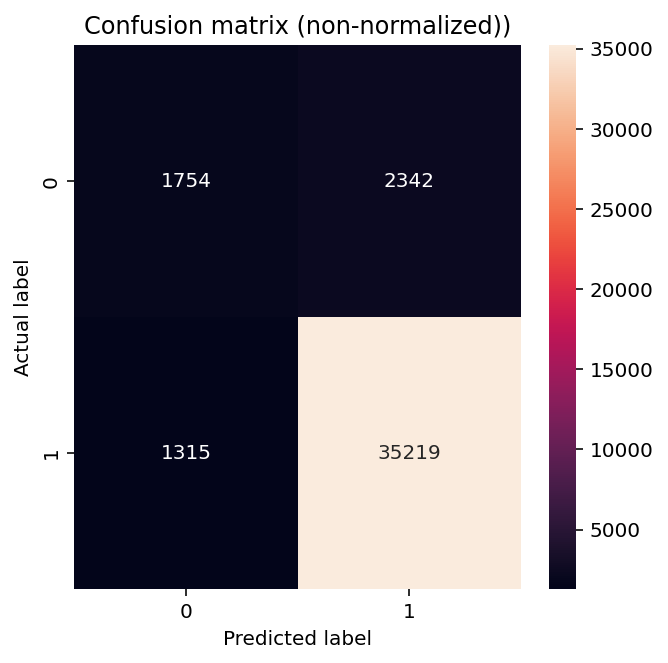

In [50]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             roc_auc_score)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

final_report = classification_report(Y_test, Y_pred)
print(final_report)


def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("Confusion matrix (non-normalized))")
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")


plot_cm(Y_test, Y_pred)

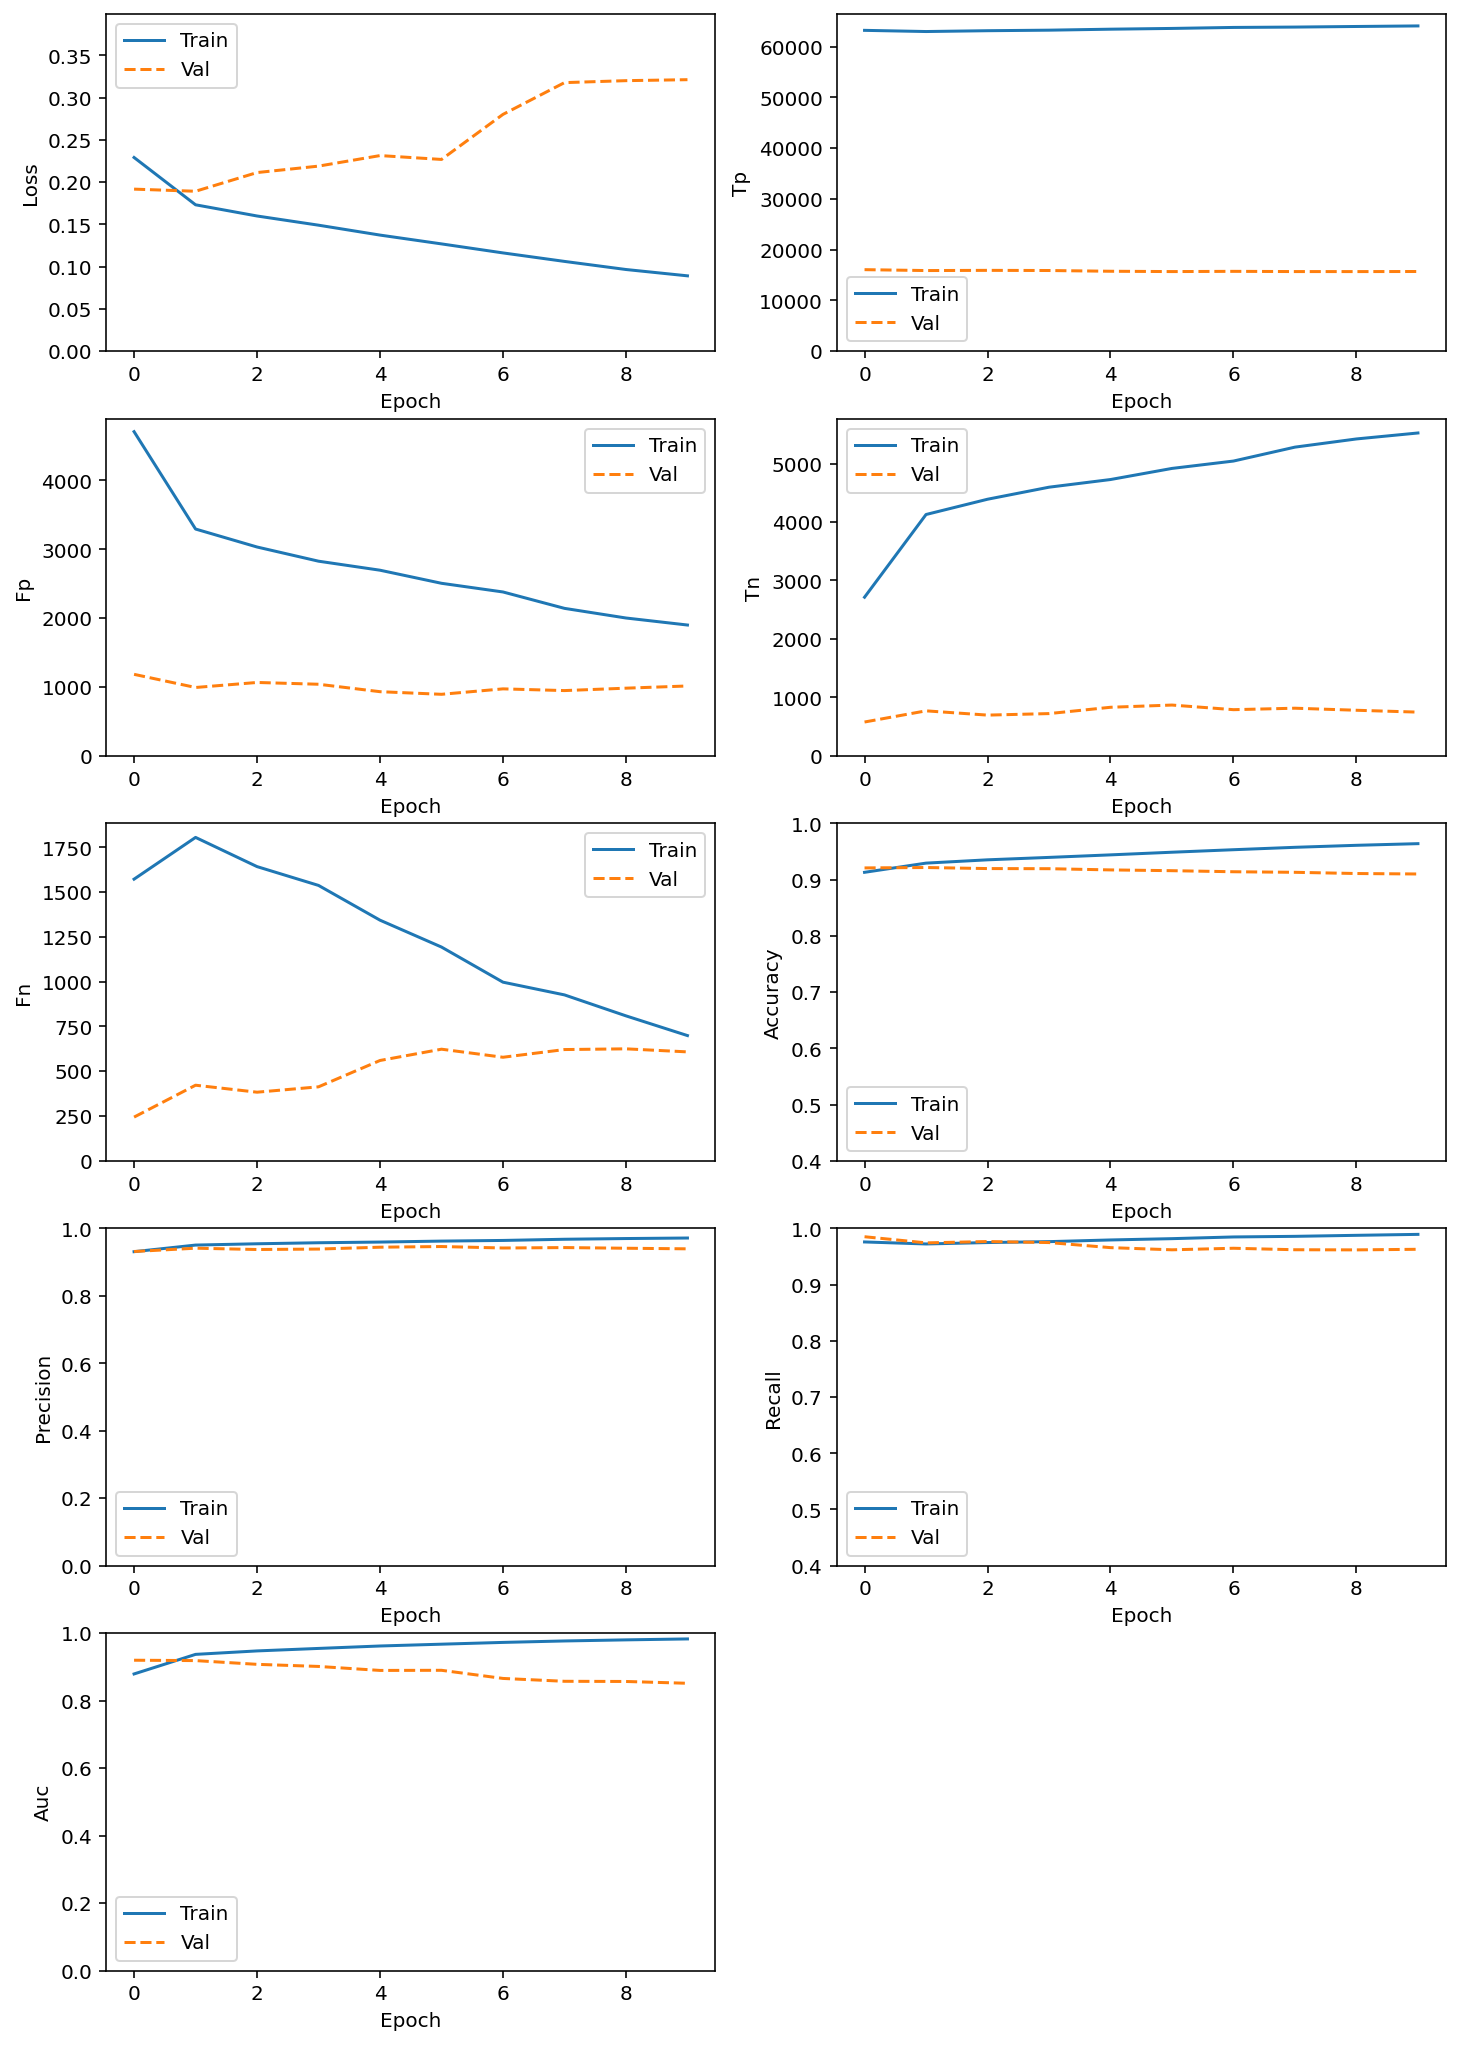

In [51]:
#plt.style.use("fivethirtyeight")

# Cross Validation Classification Accuracy

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
mpl.rcParams["figure.figsize"] = (12, 18)

def plot_metrics(history):
    metrics = [
        "loss",
        "tp", "fp", "tn", "fn",
        "accuracy",
        "precision", "recall",
        "auc",
    ]
    for n, metric in enumerate(metrics):
        name = metric.replace("_", " ").capitalize()
        plt.subplot(5, 2, n + 1)
        plt.plot(
            history.epoch,
            history.history[metric],
            color=colors[0],
            label="Train",
        )
        plt.plot(
            history.epoch,
            history.history["val_" + metric],
            color=colors[1],
            linestyle="--",
            label="Val",
        )
        plt.xlabel("Epoch")
        plt.ylabel(name)
        if metric == "loss":
            plt.ylim([0, plt.ylim()[1] * 1.2])
        elif metric == "accuracy":
            plt.ylim([0.4, 1])
        elif metric == "fn":
            plt.ylim([0, plt.ylim()[1]])
        elif metric == "fp":
            plt.ylim([0, plt.ylim()[1]])
        elif metric == "tn":
            plt.ylim([0, plt.ylim()[1]])
        elif metric == "tp":
            plt.ylim([0, plt.ylim()[1]])
        elif metric == "precision":
            plt.ylim([0, 1])
        elif metric == "recall":
            plt.ylim([0.4, 1])
        else:
            plt.ylim([0, 1])

        plt.legend()

plot_metrics(history)

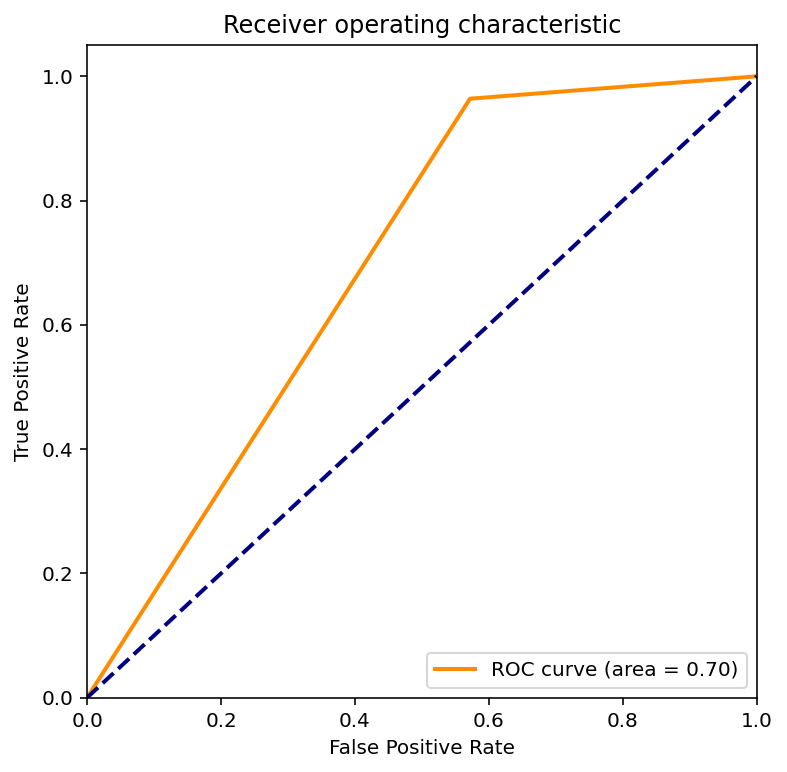

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

mpl.rcParams["figure.figsize"] = (6, 6)

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score

# Binarize the output
y_bin = label_binarize(Y_test, classes=[0, 1])
n_classes = 1

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test.ravel(), Y_pred.ravel())
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()